In [2]:
import qiskit as q
%matplotlib inline

circuit = q.QuantumCircuit(2,2) #2 quibits, 2 classical bits
circuit.x(0) #not
circuit.cx(0, 1) #cnot; controlled not
circuit.measure([0, 1], [0, 1])
circuit.draw()

┌───┐     ┌─┐   
q_0: ┤ X ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

C:\Users\Nalini Ajwani\anaconda3\lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


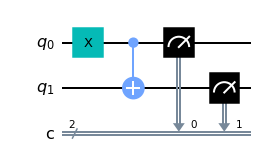

In [3]:
circuit.draw(output="mpl")

In [ ]:
from qiskit import IBMQ
IBMQ.save_account("token")

In [5]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [6]:
provider = IBMQ.get_provider("ibm-q")
for backend in provider.backends():
    try:
        qubit_count = len(backend.properties().qubits)
    except:
        qubit_count = "simulated"
        
    print(f"{backend.name()} has {backend.status().pending_jobs} queued and {qubit_count} qubits")

ibmq_qasm_simulator has 0 queued and simulated qubits
simulator_statevector has 0 queued and simulated qubits
simulator_mps has 0 queued and simulated qubits
simulator_extended_stabilizer has 0 queued and simulated qubits
simulator_stabilizer has 0 queued and simulated qubits
ibm_lagos has 21 queued and 7 qubits
ibm_nairobi has 22 queued and 7 qubits
ibm_perth has 1137 queued and 7 qubits
ibm_brisbane has 55 queued and 127 qubits


In [13]:
from qiskit.tools.monitor import job_monitor

backend = provider.get_backend("ibm_lagos")
job = q.execute(circuit, backend=backend, shots=500)
job_monitor(job)

Job Status: job is queued (None)

IBMQJobApiError: '"HTTPSConnectionPool(host=\'api.quantum-computing.ibm.com\', port=443): Max retries exceeded with url: /api/Network/ibm-q/Groups/open/Projects/main/Jobs/cnak26gr0vyg008d94cg/status/v/1 (Caused by NewConnectionError(\'<urllib3.connection.HTTPSConnection object at 0x0000022B196BD8E0>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed\'))"'

In [9]:
from qiskit.visualization import plot_histogram
from matplotlib import style

style.use("dark-background")

result = job.result()
counts = result.get_counts(circuit)

plot_histogram([counts])

In [10]:
backend = provider.get_backend("ibmq_qasm_simulator")
circuit = q.QuantumCircuit(2,2) #2 quibits, 2 classical bits
circuit.h(0) #not
circuit.cx(0, 1) #cnot; controlled not
circuit.measure([0, 1], [0, 1])
circuit.draw()

┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

In [12]:
job = q.execute(circuit, backend = backend, shots=500)
job_monitor(job)

In [ ]:
result = job.result()
counts = result.get_counts(circuit)
plot_histogram(counts)